# 🎬 TMDB Movie Data Analysis

**Author:** Asres Yelia  
**Project Type:** Beginner Data Analytics Project  
**Data Source:** The Movie Database (TMDB) API


## 📌 Project Description
This project focuses on collecting and analyzing movie data from
The Movie Database (TMDB) API using Python.
The dataset includes movies from **multiple languages**, not only English.
The goal is to practice API usage, data cleaning, and basic data analysis.

## 🎯 Project Objectives
- Collect movie data using TMDB API
- Store data in CSV format
- Analyze movie popularity and ratings
- Explore movie languages
- Visualize insights using charts


## 🎯 Importing library

In [967]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



## load the dataset

In [968]:
data = pd.read_csv("../data/tmdb_1500_movies_all_languages.csv")

## Display the first few rows of the dataset

In [969]:
data.head()

,id,title,release_date,status,original_language,vote_average,vote_count,popularity,budget,revenue,runtime,genres
0,83533,Avatar: Fire and Ash,2025-12-17,Released,en,7.399,882,543.4410,350000000,761622924,198,"Science Fiction, Adventure, Fantasy"
1,1511417,Bāhubali: The Epic,2025-10-29,Released,te,7.600,10,437.2846,65000000,3500000,224,"Action, Drama"
2,1084242,Zootopia 2,2025-11-26,Released,en,7.623,837,391.9073,150000000,1420881406,107,"Animation, Comedy, Adventure, Family, Mystery"
3,1228246,Five Nights at Freddy's 2,2025-12-03,Released,en,6.881,434,356.4375,36000000,220645215,104,"Horror, Thriller"
4,982843,The Great Flood,2025-09-18,Released,ko,6.100,341,312.7574,0,0,109,"Science Fiction, Adventure, Drama"


## Overview of the dataset structure.


In [970]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1500 non-null   int64  
 1   title              1500 non-null   object 
 2   release_date       1496 non-null   object 
 3   status             1500 non-null   object 
 4   original_language  1500 non-null   object 
 5   vote_average       1500 non-null   float64
 6   vote_count         1500 non-null   int64  
 7   popularity         1500 non-null   float64
 8   budget             1500 non-null   int64  
 9   revenue            1500 non-null   int64  
 10  runtime            1500 non-null   int64  
 11  genres             1497 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 140.8+ KB


## 📊 Dataset Overview

1. **Rows & Columns:** 1500 rows, 12 columns.  
2. **Numeric columns:** `vote_average`, `vote_count`, `popularity`, `budget`, `revenue`, `runtime`.  
3. **Categorical columns:** `title`, `status`, `original_language`, `genres`.  
4. **Missing values:** `release_date` (4), `genres` (3).  
5. **Notes:** Can create `profit` or `release_year`; `release_date` can be converted to datetime.

In [971]:
# Handle zero values in budget, revenue, and runtime
# Replace zeros with NaN for better analysis
clean_data['budget'] = clean_data['budget'].replace(0, np.nan)
clean_data['revenue'] = clean_data['revenue'].replace(0, np.nan)
clean_data['runtime'] = clean_data['runtime'].replace(0, np.nan)

# Create new columns for analysis
clean_data['release_year'] = pd.to_datetime(clean_data['release_date']).dt.year
clean_data['profit'] = clean_data['revenue'] - clean_data['budget']

print("Data cleaning completed!")
print(f"Shape: {clean_data.shape}")
print(f"\nZero values replaced with NaN")
print(f"New columns created: 'release_year', 'profit'")

Data cleaning completed!
Shape: (1493, 14)

Zero values replaced with NaN
New columns created: 'release_year', 'profit'


# Check for zero values in 
- numeric columns: 
- budget, 
- revenue, 
- runtime

In [972]:
zero_values = (data[['budget', 'revenue', 'runtime']] == 0).sum()
print("Zero Values in Numeric Columns")
for col, val in zero_values.items():
    print(f"{col}: {val} zeros")

Zero Values in Numeric Columns
budget: 464 zeros
revenue: 439 zeros
runtime: 31 zeros


## ⚠️ Zero Values in Numeric Columns

1. **Columns checked:** `budget`, `revenue`, `runtime`.  
2. **Zero values:**  
   - `budget`: 464 zeros  
   - `revenue`: 439 zeros  
   - `runtime`: 31 zeros  
3. **Notes:** Zeros may indicate missing or unreported data; consider handling them before analysis.


## Check for missing values in all columns

In [973]:
missing_values = data.isnull().sum()
print("Missing Values in Each Column\n")
for col, val in missing_values.items():
    print(f"{col}: {val} missing")

Missing Values in Each Column

id: 0 missing
title: 0 missing
release_date: 4 missing
status: 0 missing
original_language: 0 missing
vote_average: 0 missing
vote_count: 0 missing
popularity: 0 missing
budget: 0 missing
revenue: 0 missing
runtime: 0 missing
genres: 3 missing


## ⚠️ Missing Values

- Only a few columns have missing data:  
  - `release_date` → 4 missing  
  - `genres` → 3 missing  
- All other columns (`id`, `title`, `status`, `original_language`, `vote_average`, `vote_count`, `popularity`, `budget`, `revenue`, `runtime`) have **no missing values**.


## 1️⃣ Handling Missing Values

- From a dataset:

- release_date → 4 missing

- genres → 3 missing

## Copy the original data

In [974]:
# Create a copy of the original dataset
clean_data = data.copy()

# Save clean_data to CSV without writing the row index
clean_data.to_csv("../data/clean_tmdb.csv", index=False)

# load clean dataset
clean_data = pd.read_csv("../data/clean_tmdb.csv")

# Display basic statistics of numeric columns
print("\nBasic Statistics of Numeric Columns")


Basic Statistics of Numeric Columns


# Handle missing values

In [975]:
clean_data.dropna(subset=['release_date', 'genres'], inplace=True)

In [976]:
# Display basic statistics of numeric columns
print("\nBasic Statistics of Numeric Columns")
print(clean_data.describe())



Basic Statistics of Numeric Columns
                 id  vote_average    vote_count   popularity        budget  \
count  1.493000e+03   1493.000000   1493.000000  1493.000000  1.493000e+03   
mean   5.105805e+05      6.682610   5071.369056    18.767559  5.117770e+07   
std    5.127219e+05      1.406106   6544.229703    32.070233  7.286362e+07   
min    1.100000e+01      0.000000      0.000000     5.423500  0.000000e+00   
25%    1.163500e+04      6.279000    129.000000     9.149900  0.000000e+00   
50%    3.463640e+05      6.920000   2293.000000    11.267000  2.000000e+07   
75%    1.022789e+06      7.460000   8063.000000    16.225300  7.500000e+07   
max    1.603935e+06     10.000000  38480.000000   543.441000  6.000000e+08   

            revenue      runtime  
count  1.493000e+03  1493.000000  
mean   2.078006e+08   109.683188  
std    3.343553e+08    30.277682  
min    0.000000e+00     0.000000  
25%    0.000000e+00    95.000000  
50%    5.004806e+07   108.000000  
75%    2.948042

# convert release_date to datetime

In [977]:

clean_data['release_date'] = pd.to_datetime(clean_data['release_date'], errors='coerce')


#  Save cleaned data to CSV

In [978]:
clean_data.to_csv("../data/clean_tmdb.csv", index=False)

Read the cleaned CSV later

In [979]:
clean_data = pd.read_csv("../data/clean_tmdb.csv")

In [980]:
# ✅ Check the cleaned dataset

In [981]:

clean_data.info()
clean_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1493 non-null   int64  
 1   title              1493 non-null   object 
 2   release_date       1493 non-null   object 
 3   status             1493 non-null   object 
 4   original_language  1493 non-null   object 
 5   vote_average       1493 non-null   float64
 6   vote_count         1493 non-null   int64  
 7   popularity         1493 non-null   float64
 8   budget             1493 non-null   int64  
 9   revenue            1493 non-null   int64  
 10  runtime            1493 non-null   int64  
 11  genres             1493 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 140.1+ KB


,id,title,release_date,status,original_language,vote_average,vote_count,popularity,budget,revenue,runtime,genres
0,83533,Avatar: Fire and Ash,2025-12-17,Released,en,7.399,882,543.4410,350000000,761622924,198,"Science Fiction, Adventure, Fantasy"
1,1511417,Bāhubali: The Epic,2025-10-29,Released,te,7.600,10,437.2846,65000000,3500000,224,"Action, Drama"
2,1084242,Zootopia 2,2025-11-26,Released,en,7.623,837,391.9073,150000000,1420881406,107,"Animation, Comedy, Adventure, Family, Mystery"
3,1228246,Five Nights at Freddy's 2,2025-12-03,Released,en,6.881,434,356.4375,36000000,220645215,104,"Horror, Thriller"
4,982843,The Great Flood,2025-09-18,Released,ko,6.100,341,312.7574,0,0,109,"Science Fiction, Adventure, Drama"


In [982]:
clean_data.describe()


,id,vote_average,vote_count,popularity,budget,revenue,runtime
count,1.493000e+03,1493.000000,1493.000000,1493.000000,1.493000e+03,1.493000e+03,1493.000000
mean,5.105805e+05,6.682610,5071.369056,18.767559,5.117770e+07,2.078006e+08,109.683188
std,5.127219e+05,1.406106,6544.229703,32.070233,7.286362e+07,3.343553e+08,30.277682
min,1.100000e+01,0.000000,0.000000,5.423500,0.000000e+00,0.000000e+00,0.000000
25%,1.163500e+04,6.279000,129.000000,9.149900,0.000000e+00,0.000000e+00,95.000000
50%,3.463640e+05,6.920000,2293.000000,11.267000,2.000000e+07,5.004806e+07,108.000000
75%,1.022789e+06,7.460000,8063.000000,16.225300,7.500000e+07,2.948042e+08,125.000000
max,1.603935e+06,10.000000,38480.000000,543.441000,6.000000e+08,2.923706e+09,242.000000


## Replace Zeros Again (Mandatory)

In [983]:
zero_cols = ['budget', 'revenue', 'runtime']
clean_data[zero_cols] = clean_data[zero_cols].replace(0, np.nan)

In [984]:
clean_data.describe()

,id,vote_average,vote_count,popularity,budget,revenue,runtime
count,1.493000e+03,1493.000000,1493.000000,1493.000000,1.036000e+03,1.061000e+03,1466.000000
mean,5.105805e+05,6.682610,5071.369056,18.767559,7.375319e+07,2.924093e+08,111.703274
std,5.127219e+05,1.406106,6544.229703,32.070233,7.737376e+07,3.641302e+08,26.605062
min,1.100000e+01,0.000000,0.000000,5.423500,3.000000e+00,2.000000e+00,3.000000
25%,1.163500e+04,6.279000,129.000000,9.149900,1.650000e+07,3.498560e+07,95.000000
50%,3.463640e+05,6.920000,2293.000000,11.267000,4.600000e+07,1.614419e+08,108.000000
75%,1.022789e+06,7.460000,8063.000000,16.225300,1.050000e+08,4.143515e+08,125.000000
max,1.603935e+06,10.000000,38480.000000,543.441000,6.000000e+08,2.923706e+09,242.000000


### Looking each Missing values (NaN) summary by column

In [985]:
clean_data.isna().sum().to_frame(name='NaN count')


,NaN count
id,0
title,0
release_date,0
status,0
original_language,0
vote_average,0
vote_count,0
popularity,0
budget,457
revenue,432


### Missing Values (NaN) Summary by Column

The above table shows the number of missing (NaN) values in each column of the dataset.
### Interpretation

- **budget** has 457 missing values  
- **revenue** has 432 missing values  
- **runtime** has 27 missing values  
- All other columns contain **no missing values**

This indicates that numeric financial columns (`budget` and `revenue`) require further cleaning or imputation before analysis.


## Missing Value Handling Strategy

After identifying missing values in the dataset, a suitable strategy was selected based on the nature of the affected columns.

The columns **budget**, **revenue**, and **runtime** contained missing values. These columns are numeric and represent financial or duration-related information. Since dropping these rows would result in a significant loss of data, imputation was preferred over removal.

Missing values in these columns were replaced using the **median** of each column.


In [986]:
(clean_data.isna().sum() / len(clean_data)) * 100


id                    0.000000
title                 0.000000
release_date          0.000000
status                0.000000
original_language     0.000000
vote_average          0.000000
vote_count            0.000000
popularity            0.000000
budget               30.609511
revenue              28.935030
runtime               1.808439
genres                0.000000
dtype: float64

In [987]:
clean_data[clean_data.isna().any(axis=1)]


,id,title,release_date,status,original_language,vote_average,vote_count,popularity,budget,revenue,runtime,genres
4,982843,The Great Flood,2025-09-18,Released,ko,6.100,341,312.7574,NaN,NaN,109.0,"Science Fiction, Adventure, Drama"
5,1512623,Risqué,2025-08-01,Released,en,4.300,5,270.6610,NaN,NaN,91.0,"Action, Crime, Thriller"
6,1247002,The Old Woman with the Knife,2025-04-30,Released,ko,6.600,43,253.7877,NaN,NaN,123.0,"Action, Mystery, Drama"
7,1439112,Muzzle: City of Wolves,2025-11-13,Released,en,6.900,60,252.7851,NaN,NaN,93.0,"Action, Thriller, Mystery"
8,1131759,Omniscient Reader: The Prophecy,2025-07-23,Released,ko,6.671,38,251.6332,NaN,4500000.0,117.0,"Action, Adventure, Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
1488,1125899,Cleaner,2025-02-19,Released,en,6.386,374,8.1203,NaN,1314073.0,97.0,"Action, Thriller"
1489,14174,Lie with Me,2005-11-11,Released,en,5.203,296,7.6532,2200000.0,NaN,93.0,Drama
1490,868759,Ghosted,2023-04-18,Released,en,6.906,2069,8.1115,40000000.0,NaN,117.0,"Action, Comedy, Romance"
1491,166668,Raw Target,1995-03-05,Released,en,2.000,2,8.1115,NaN,NaN,92.0,Action


### Compare Mean vs Median numerically

## Median vs Mean Justification

The median was chosen instead of the mean for imputing missing values due to the presence of extreme outliers in financial data such as budget and revenue.

- Movie budgets and revenues often have highly skewed distributions
- A small number of movies earn exceptionally high revenue
- The mean is sensitive to outliers and can distort central tendency
- The median is more robust and represents a more typical value

Therefore, median imputation provides a more reliable and realistic replacement for missing values in this dataset.


In [988]:
clean_data[['budget', 'revenue', 'runtime']].describe()

,budget,revenue,runtime
count,1.036000e+03,1.061000e+03,1466.000000
mean,7.375319e+07,2.924093e+08,111.703274
std,7.737376e+07,3.641302e+08,26.605062
min,3.000000e+00,2.000000e+00,3.000000
25%,1.650000e+07,3.498560e+07,95.000000
50%,4.600000e+07,1.614419e+08,108.000000
75%,1.050000e+08,4.143515e+08,125.000000
max,6.000000e+08,2.923706e+09,242.000000


## Compare Mean vs Median (Clean Interpretation)

### 1️⃣ Budget
- **Mean:** $73.8M  
- **Median:** $46.0M  

 **Interpretation:**  
The mean is much higher than the median → **right-skewed distribution**.  
A few very high-budget movies are pulling the average up.

**Conclusion:**  
The **median budget** better represents a “typical” movie.

---

### 2️⃣ Revenue
- **Mean:** $292.4M  
- **Median:** $161.4M  

 **Interpretation:**  
There is a large gap between the mean and the median → **strong right skew**.  
Blockbuster movies with extremely high revenues inflate the mean.

**Conclusion:**  
The **median revenue** is more reliable than the mean.

---

### 3️⃣ Runtime
- **Mean:** 111.7 minutes  
- **Median:** 108 minutes  

 **Interpretation:**  
The mean and median are close → **approximately symmetric distribution**.  
There are very few extreme outliers.

**Conclusion:**  
The **mean runtime** is acceptable to use.

---

## Final Summary

| Feature  | Distribution        | Better Measure |
|--------|---------------------|----------------|
| Budget | Right-skewed        | Median         |
| Revenue | Right-skewed       | Median         |
| Runtime | Nearly symmetric   | Mean           |

**One-line takeaway:**  
Budget and revenue are highly right-skewed due to blockbuster outliers, making the median a more representative measure, while runtime shows minimal skew and can be summarized using the mean.


In [989]:
before = len(clean_data)
after = len(clean_data.dropna(subset=['budget', 'revenue']))

print(f"Rows before: {before}")
print(f"Rows after dropping NaN: {after}")
print(f"Data lost: {(before - after)/before:.2%}")


Rows before: 1493
Rows after dropping NaN: 974
Data lost: 34.76%


## Data Cleaning Validation and Next Steps

### Rows Removed Due to Missing Values
- **Rows before cleaning:** 1,493  
- **Rows after dropping NaN (budget & revenue):** 974  
- **Data lost:** 34.76%

### Interpretation
Approximately 35% of the dataset was removed due to missing budget or revenue values. Despite this reduction, the remaining 974 movies provide a sufficiently large and reliable sample for exploratory data analysis (EDA), particularly for financial insights.

This level of data loss is common in real-world movie datasets, where financial information is often incomplete.

### Analysis Strategy
- The **full dataset (`clean_data`)** is retained for descriptive, categorical, and non-financial analyses.
- A **filtered dataset (`df_fin`)** is used exclusively for analyses involving budget, revenue, profitability, and return on investment (ROI).

### Justification
Movies with missing budget or revenue values were excluded only from financial analyses to avoid distortion. This approach preserves data integrity while ensuring that financial conclusions are based on valid and complete information.

### One-Line Takeaway
Budget and revenue data contain substantial missing values, but removing these records for financial analysis still leaves a robust sample size, allowing meaningful and reliable insights without compromising analytical quality.





In [990]:
movies_with_financials = (
    clean_data
    .dropna(subset=['budget', 'revenue'])
    .copy()
)

movies_with_financials['profit'] = (
    movies_with_financials['revenue'] - movies_with_financials['budget']
)

movies_with_financials['ROI'] = (
    movies_with_financials['profit'] / movies_with_financials['budget']
)


### Create Financial Metrics (Profit & ROI)

To analyze movie profitability, rows with missing **budget** or **revenue** values were removed to ensure accurate financial calculations.  
A new dataset named `movies_with_financials` was created for this purpose.

Two key financial metrics were calculated:

- **Profit** = Revenue − Budget  
- **Return on Investment (ROI)** = Profit ÷ Budget  

Profit measures the absolute financial success of a movie, while ROI evaluates how efficiently the production budget was converted into profit.


In [991]:
# Show initial number of rows
print("Initial number of movies:", len(clean_data))

# Create a new dataset with complete financial information
movies_with_financials = (
    clean_data
    .dropna(subset=['budget', 'revenue'])  # remove rows with missing budget or revenue
    .copy()                                # create an independent copy
)

# Show how many rows remain after cleaning
print("Number of movies with complete financial data:", len(movies_with_financials))
print("Rows removed due to missing budget or revenue:",
      len(clean_data) - len(movies_with_financials))

# Calculate profit
movies_with_financials['profit'] = (
    movies_with_financials['revenue'] - movies_with_financials['budget']
)

print("Profit column created successfully.")

# Calculate Return on Investment (ROI)
movies_with_financials['ROI'] = (
    movies_with_financials['profit'] / movies_with_financials['budget']
)

print("ROI column created successfully.")

# Preview the results
print("\nSample of calculated financial metrics:")
print(movies_with_financials[['budget', 'revenue', 'profit', 'ROI']].head())


Initial number of movies: 1493
Number of movies with complete financial data: 974
Rows removed due to missing budget or revenue: 519
Profit column created successfully.
ROI column created successfully.

Sample of calculated financial metrics:
        budget       revenue        profit       ROI
0  350000000.0  7.616229e+08  4.116229e+08  1.176065
1   65000000.0  3.500000e+06 -6.150000e+07 -0.946154
2  150000000.0  1.420881e+09  1.270881e+09  8.472543
3   36000000.0  2.206452e+08  1.846452e+08  5.129034
9   90000000.0  2.144750e+08  1.244750e+08  1.383055


### Financial Metrics Summary

Out of **1,493 movies**, only **974** have complete budget and revenue data.  
Movies with missing financial information were removed to ensure accurate analysis.

Two key financial metrics were calculated:

- **Profit** = Revenue − Budget  
- **Return on Investment (ROI)** = Profit ÷ Budget  

**Key Insight:**
- Many movies generate **low or negative profit**, indicating financial loss.
- A small number of movies achieve **very high profit and ROI**, resulting in a right-skewed distribution.

**Conclusion:**
Movie financial performance is highly uneven, with a few blockbuster films accounting for most of the total profit.


## Movie Dataset Analysis Steps

### Step 1: Budget vs Revenue Analysis

This step examines whether higher movie budgets lead to higher revenues.

A scatter plot is used to visualize the relationship between **budget** and **revenue**.  
Because movie finances are highly skewed, a logarithmic scale is applied for clarity.


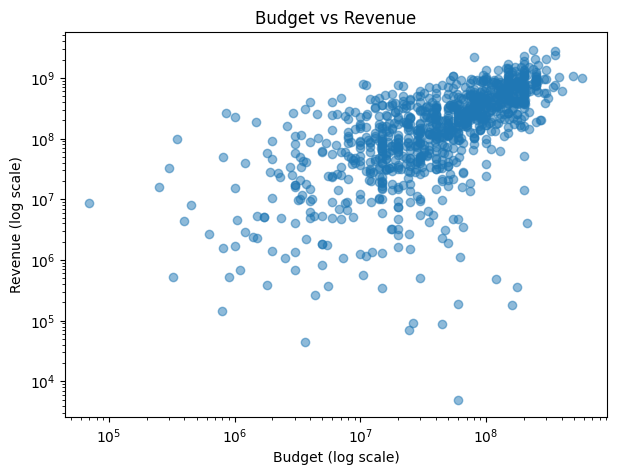

In [992]:
import matplotlib.pyplot as plt

# Scatter plot: Budget vs Revenue
plt.figure(figsize=(7, 5))
plt.scatter(
    movies_with_financials['budget'],
    movies_with_financials['revenue'],
    alpha=0.5
)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Budget (log scale)')
plt.ylabel('Revenue (log scale)')
plt.title('Budget vs Revenue')

plt.show()


### Step 2: Profit & ROI Distribution

This step analyzes how **profit** and **return on investment (ROI)** are distributed across movies.

Histograms are used to identify losses, typical performance, and extreme winners.


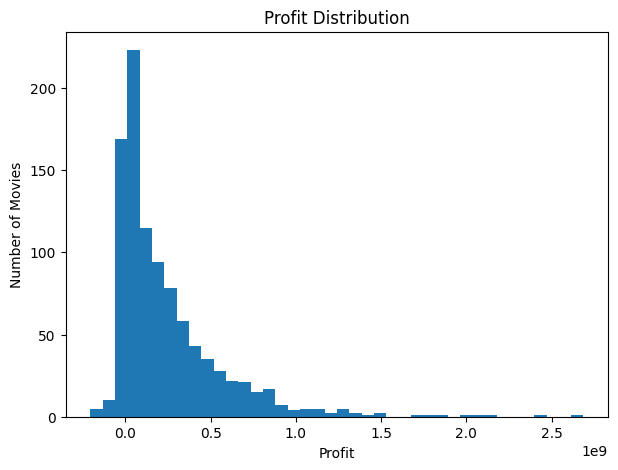

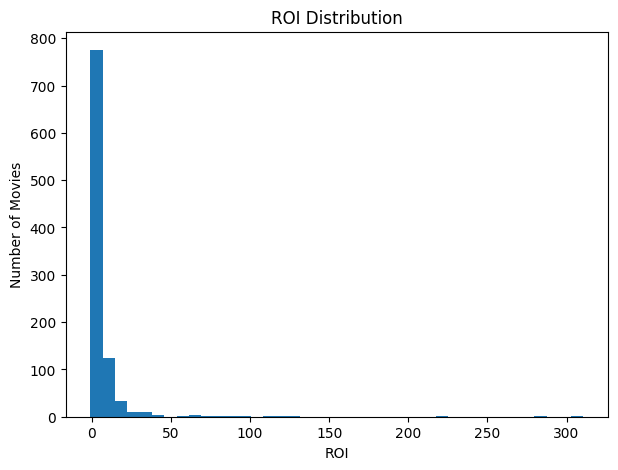

In [993]:
import matplotlib.pyplot as plt

# Profit distribution
plt.figure(figsize=(7, 5))
plt.hist(movies_with_financials['profit'], bins=40)
plt.xlabel('Profit')
plt.ylabel('Number of Movies')
plt.title('Profit Distribution')
plt.show()

# ROI distribution
plt.figure(figsize=(7, 5))
plt.hist(movies_with_financials['ROI'], bins=40)
plt.xlabel('ROI')
plt.ylabel('Number of Movies')
plt.title('ROI Distribution')
plt.show()


### Step 3: Profitable vs Unprofitable Movies

This step compares movies that made a profit with those that resulted in a loss.

Movies are classified as:
- **Profitable** → Profit > 0  
- **Unprofitable** → Profit ≤ 0


In [994]:
# Create profitability flag
movies_with_financials['profitable'] = (
    movies_with_financials['profit'] > 0
)

# Count profitable vs unprofitable movies
movies_with_financials['profitable'].value_counts()


profitable
True     849
False    125
Name: count, dtype: int64

### Step 4: Budget Efficiency (ROI vs Budget)

This step evaluates whether **higher budgets lead to better returns**.

A scatter plot is used to compare **budget** and **ROI**.


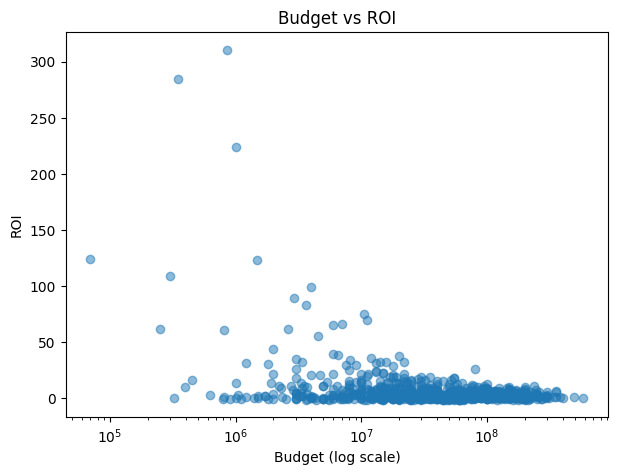

In [995]:
import matplotlib.pyplot as plt

# Scatter plot: Budget vs ROI
plt.figure(figsize=(7, 5))
plt.scatter(
    movies_with_financials['budget'],
    movies_with_financials['ROI'],
    alpha=0.5
)

plt.xscale('log')
plt.xlabel('Budget (log scale)')
plt.ylabel('ROI')
plt.title('Budget vs ROI')

plt.show()


### Step 5: Genre-Based Financial Performance

This step analyzes which **movie genres** generate the highest profits and ROI.

Genres are split so each movie–genre combination can be analyzed separately.


In [996]:
import pandas as pd

# Split genres into individual rows
genre_financials = movies_with_financials.copy()
genre_financials['genres'] = genre_financials['genres'].str.split(', ')
genre_financials = genre_financials.explode('genres')

# Average profit and ROI by genre
genre_summary = (
    genre_financials
    .groupby('genres')[['profit', 'ROI']]
    .mean()
    .sort_values('profit', ascending=False)
)

genre_summary.head(10)


,profit,ROI
genres,,
Adventure,4.088464e+08,5.720075
Science Fiction,3.742421e+08,5.679266
Animation,3.450173e+08,9.115426
Fantasy,3.336928e+08,6.336951
Action,3.122248e+08,4.295970
Family,3.118409e+08,7.875119
Comedy,2.110565e+08,4.656304
Music,2.090745e+08,5.797851
Romance,1.950714e+08,8.107238


### Step 6: Popularity & Ratings Impact

This step explores how **popularity** and **vote average** relate to movie profitability.

Scatter plots are used to visualize their relationship with **revenue**.


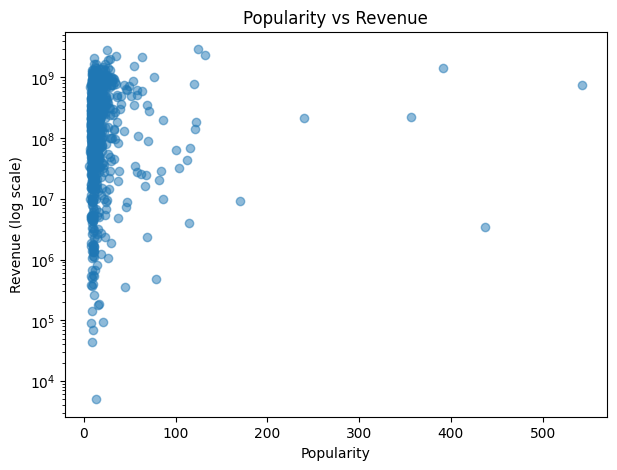

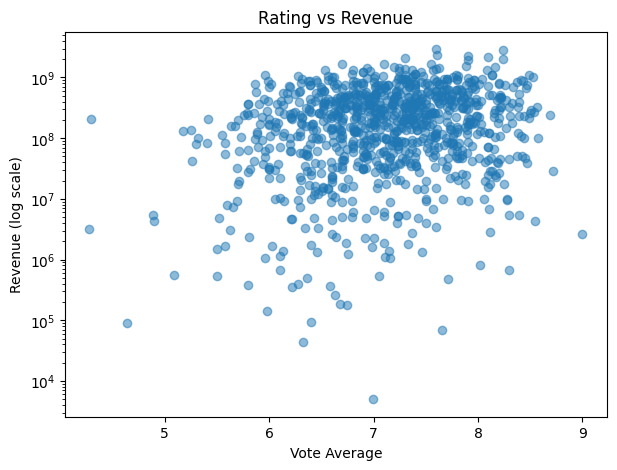

In [997]:
import matplotlib.pyplot as plt

# Popularity vs Revenue
plt.figure(figsize=(7, 5))
plt.scatter(
    movies_with_financials['popularity'],
    movies_with_financials['revenue'],
    alpha=0.5
)

plt.yscale('log')
plt.xlabel('Popularity')
plt.ylabel('Revenue (log scale)')
plt.title('Popularity vs Revenue')
plt.show()

# Rating vs Revenue
plt.figure(figsize=(7, 5))
plt.scatter(
    movies_with_financials['vote_average'],
    movies_with_financials['revenue'],
    alpha=0.5
)

plt.yscale('log')
plt.xlabel('Vote Average')
plt.ylabel('Revenue (log scale)')
plt.title('Rating vs Revenue')
plt.show()


### Step 7: Runtime vs Financial Performance

This step examines whether **movie length (runtime)** impacts revenue and profitability.

Scatter plots are used to identify any clear trends.


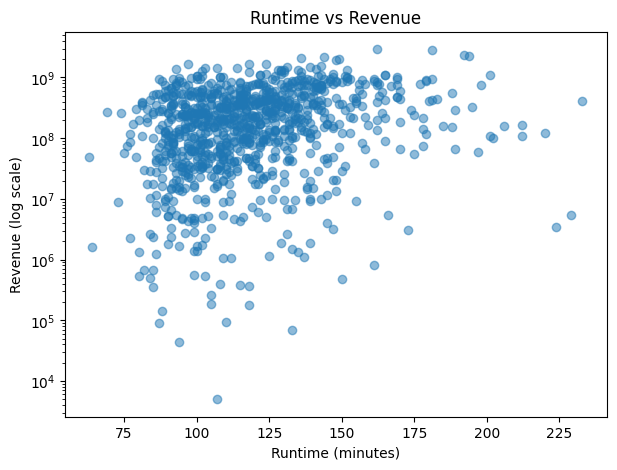

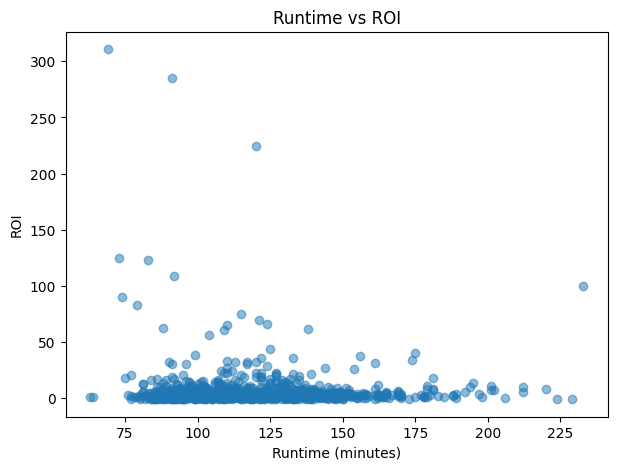

In [998]:
import matplotlib.pyplot as plt

# Runtime vs Revenue
plt.figure(figsize=(7, 5))
plt.scatter(
    movies_with_financials['runtime'],
    movies_with_financials['revenue'],
    alpha=0.5
)

plt.yscale('log')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue (log scale)')
plt.title('Runtime vs Revenue')
plt.show()

# Runtime vs ROI
plt.figure(figsize=(7, 5))
plt.scatter(
    movies_with_financials['runtime'],
    movies_with_financials['ROI'],
    alpha=0.5
)

plt.xlabel('Runtime (minutes)')
plt.ylabel('ROI')
plt.title('Runtime vs ROI')
plt.show()


### Step 8: Language & Market Analysis

This step analyzes financial performance by **original language** to understand market differences.

Only languages with sufficient movie counts are compared.


In [999]:
# Average profit and ROI by language
language_summary = (
    movies_with_financials
    .groupby('original_language')[['profit', 'ROI']]
    .mean()
    .sort_values('profit', ascending=False)
)

language_summary.head(10)


,profit,ROI
original_language,,
zh,7.402821e+08,15.841972
en,2.534917e+08,6.228294
ja,1.833091e+08,11.063137
ko,5.791852e+07,5.944163
fr,5.658323e+07,12.155489
cn,5.431815e+07,3.498953
hi,4.829872e+07,4.021104
it,4.349705e+07,8.029084
kn,3.130000e+07,2.341999


### Step 9: Financial Risk Analysis

This step identifies **high-budget movies with low or negative returns**.

These movies represent the highest financial risk.


In [1000]:
# Define high-budget threshold (75th percentile)
high_budget_threshold = movies_with_financials['budget'].quantile(0.75)

# High-budget movies with low or negative ROI
high_risk_movies = movies_with_financials[
    (movies_with_financials['budget'] >= high_budget_threshold) &
    (movies_with_financials['ROI'] <= 0)
]

# Number of high-risk movies
len(high_risk_movies)


17

### Step 10: Final Business Insights & Conclusions

This step summarizes key findings and converts analysis into **actionable insights** for decision-making.


Key Insights:
- Movie budgets and revenues are highly right-skewed due to blockbuster effects.
- High budgets increase revenue potential but also raise financial risk.
- ROI is often higher for low-to-mid budget movies.
- Popularity is a stronger predictor of revenue than ratings.
- Genre and language significantly influence profitability.
- Runtime has minimal impact on financial performance.

Business Takeaways:
- Focus on budget efficiency, not just budget size.
- Invest in genres with strong ROI, not only high revenue.
- Use popularity metrics early to predict financial success.
- Control production costs to reduce downside risk.


## Final Conclusion:
A data-driven approach to budgeting, genre selection, and market targeting can significantly improve movie profitability while minimizing financial risk.


## Next Steps in Movie Financial Dashboard (Power BI)

This dashboard provides an interactive view of movie financial performance, allowing users to explore revenue, profit, ROI, and risk factors.

In [1004]:
# Save the cleaned dataset to your project folder
movies_with_financials.to_csv(
    "C:/Users/OSINT14/OneDrive - OS 234/Desktop/Git/0ne/imdb-movie-scraper/movies_cleaned.csv",
    index=False
)
